In [1]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
#read the data
fruit_data = pd.read_table('fruit_data_with_colors.txt')
fruit_data.drop('fruit_label', axis='columns', inplace=True)
fruit_data.tail()

,fruit_name,fruit_subtype,mass,width,height,color_score
54,lemon,unknown,116,6.1,8.5,0.71
55,lemon,unknown,116,6.3,7.7,0.72
56,lemon,unknown,116,5.9,8.1,0.73
57,lemon,unknown,152,6.5,8.5,0.72
58,lemon,unknown,118,6.1,8.1,0.70


In [3]:
#Using the label encoder
encoder = LabelEncoder()
lbl_1 = encoder.fit_transform(fruit_data['fruit_name'])
lbl_2 =  encoder.fit_transform(fruit_data['fruit_subtype'])

In [4]:
# printing label 1
lbl_1

array([0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
# printing label 2
lbl_2

array([3, 3, 3, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 7, 7, 7, 5, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6,
       6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [6]:
# remove the labels
fruit_data.drop("fruit_name", axis=1, inplace=True) 
fruit_data.drop("fruit_subtype", axis=1, inplace=True)
fruit_data["fruit_name"] = lbl_1 
fruit_data["fruit_subtype"] = lbl_2
fruit_data

,mass,width,height,color_score,fruit_name,fruit_subtype
0,192,8.4,7.3,0.55,0,3
1,180,8.0,6.8,0.59,0,3
2,176,7.4,7.2,0.60,0,3
3,86,6.2,4.7,0.80,2,4
4,84,6.0,4.6,0.79,2,4
5,80,5.8,4.3,0.77,2,4
6,80,5.9,4.3,0.81,2,4
7,76,5.8,4.0,0.81,2,4
8,178,7.1,7.8,0.92,0,0
9,172,7.4,7.0,0.89,0,0


In [13]:
X= fruit_data.drop(labels= 'fruit_subtype', axis = 1) #features set
y= fruit_data['fruit_subtype'] #label set

#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Classifying the data using decision tree
model = DecisionTreeClassifier(criterion='entropy')
model = model.fit(X_train, y_train) #fit the data
prediction = model.predict(X_test)

#confusion matrix
conf_matrix =multilabel_confusion_matrix(y_test,prediction)
conf_matrix

array([[[13,  0],
        [ 0,  2]],

       [[14,  0],
        [ 0,  1]],

       [[13,  1],
        [ 1,  0]],

       [[14,  0],
        [ 0,  1]],

       [[12,  1],
        [ 2,  0]],

       [[11,  2],
        [ 0,  2]],

       [[14,  0],
        [ 1,  0]],

       [[ 9,  1],
        [ 2,  3]],

       [[14,  1],
        [ 0,  0]]], dtype=int64)

Accuracy:  0.6


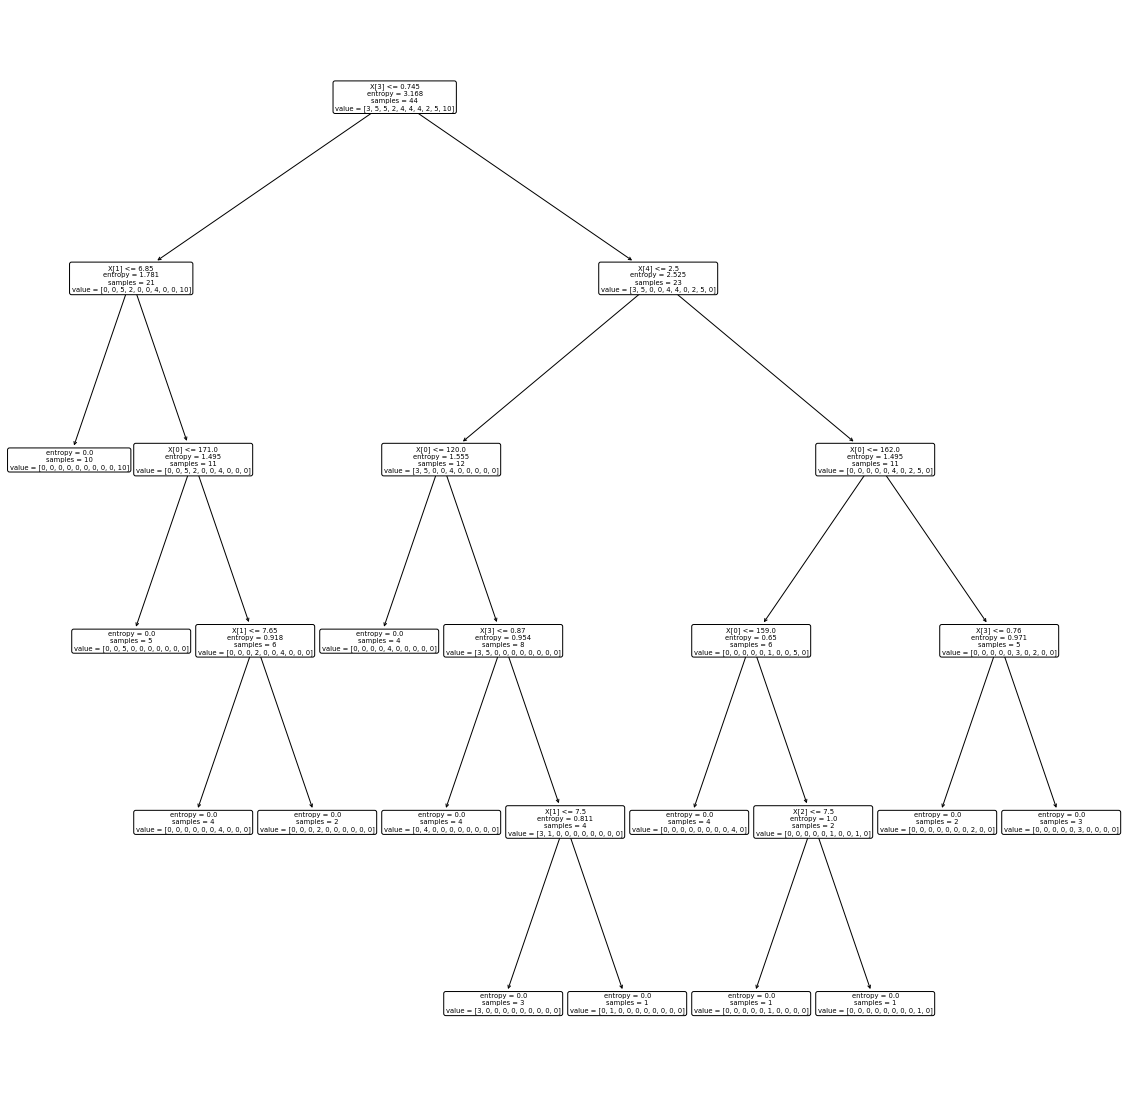

In [14]:
#Accuracy of the model
print('Accuracy: ',accuracy_score(y_test,prediction))
plt.figure(figsize=(20,20))
tree.plot_tree(model,rounded=True)
plt.show()


Accuracy:  0.6


array([[[13,  0],
        [ 0,  2]],

       [[14,  0],
        [ 0,  1]],

       [[13,  1],
        [ 1,  0]],

       [[14,  0],
        [ 0,  1]],

       [[12,  1],
        [ 2,  0]],

       [[11,  2],
        [ 0,  2]],

       [[14,  0],
        [ 1,  0]],

       [[ 9,  1],
        [ 2,  3]],

       [[14,  1],
        [ 0,  0]]], dtype=int64)

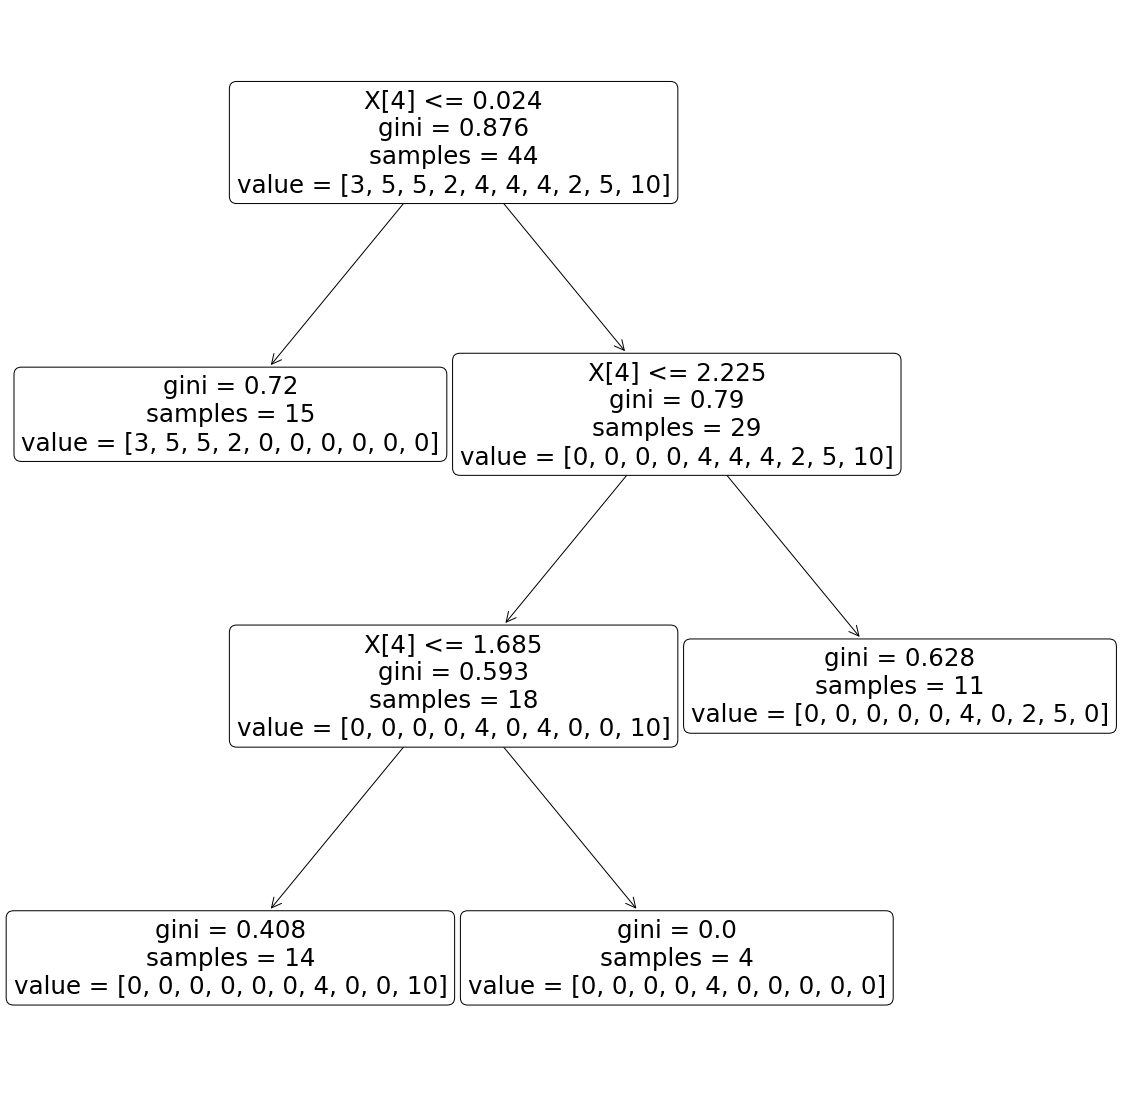

In [15]:
model=DecisionTreeClassifier(criterion= 'gini',max_depth= 17,min_samples_leaf= 3,min_samples_split= 17,splitter='random')
model.fit(X_train,y_train)
print('Accuracy: ',accuracy_score(y_test,prediction))
plt.figure(figsize=(20,20))
tree.plot_tree(model,rounded=True)
#confusion matrix
conf_matrix =multilabel_confusion_matrix(y_test,prediction)
conf_matrix

In [10]:
from sklearn.metrics import classification_report
accuracy_model = accuracy_score(y_test, prediction)
print("Accuracy: ", accuracy_model)
print(classification_report(y_test, prediction))
print("Classification Report: ", accuracy_model)


Accuracy:  0.75
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         2

    accuracy                           0.75        12
   macro avg       0.63      0.67      0.64        12
weighted avg       0.69      0.75      0.72        12

Classification Report:  0.75


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla